## Bibliotecas + Leitura Datasets

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import folium
from folium.plugins import MarkerCluster

In [39]:
# read every csv in originais directory
df_crimes = pd.read_csv('originais/crimes_com_nivel.csv', sep=',')
dicofres_available = df_crimes['dicofre'].unique()

# # Datasets a considerar excluir
df_housing = pd.read_csv('originais/housing_tenure.csv', sep=';')


# # Datasets usados
df_socioeconomico = pd.read_csv('originais/grupo_socioeconomico.csv', sep=';')
df_escolaridade = pd.read_csv('originais/nivel_escolaridade.csv', sep=';')
df_renda = pd.read_csv('originais/valor_medio_rendas.csv', sep=';')
df_residente = pd.read_csv('originais/populacao_residente.csv', sep=';')
df_desempregada = pd.read_csv('originais/desempregada_percentage.csv', sep=',')

# Trajetoria e pontos de interesse
df_trajetoria = pd.read_csv('originais/stops_30clients.csv', sep=';')
df_pois = pd.read_csv('originais/AML_POIS_GOOGLE_API_HOURS_no_estbl.csv', sep=';')


# # Excluir dicofres que não estão em df_crimes
df_housing = df_housing[df_housing['Dicofre'].isin(dicofres_available)]

df_socioeconomico = df_socioeconomico[df_socioeconomico['Dicofre'].isin(dicofres_available)]
df_escolaridade = df_escolaridade[df_escolaridade['Dicofre'].isin(dicofres_available)]
df_renda = df_renda[df_renda['Dicofre'].isin(dicofres_available)]
df_residente = df_residente[df_residente['Dicofre'].isin(dicofres_available)]
df_desempregada = df_desempregada[df_desempregada['Dicofre'].isin(dicofres_available)]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 130: invalid continuation byte

## Crimes

In [16]:
# take 'crime' and 'nivel_gravidade' 
data = df_crimes[['crime', 'nivel_gravidade']]

# remove duplicates queries from data
data = data.drop_duplicates()
data = data.sort_values('nivel_gravidade')
data = data.rename(columns={'crime': 'Macro_type'})
data = data.reset_index(drop=True)
data

,Macro_type,nivel_gravidade
0,Imigração ilegal,1
1,Atividades ilegais,1
2,Fraude,1
3,Especulação,1
4,Condução perigosa,2
5,Vandalismo,2
6,Desacatos,2
7,Roubo via publica,2
8,Roubo em transportes,2
9,Desobediencia,2


In [21]:
df_crimes = pd.read_csv('originais/crimes_freguesias_boundaries.csv', sep=';')

# merge df_crimes and data on column Macro_type
df_crimes = df_crimes.merge(data, on='Macro_type', how='left')
df_crimes.head()

,geometry,Dicofre,Freguesia,Concelho,Distrito,TAA,Area_T_ha,Area_EA_ha,Des_Simpli,centroid,...,latitude,URL,Website,Date,News Type,Title,Type,Macro_type,Local,nivel_gravidade
0,MULTIPOLYGON (((-9.15423018760155 38.715196174...,110660,Estrela,Lisboa,Lisboa,ÁREA PRINCIPAL,460.4,460.4,Estrela,POINT (-9.16345951972357 38.703763073893825),...,38.703763,https://www.publico.pt/2024/03/04/sociedade/no...,https://www.publico.pt,04/03/2024,sociedade,PJ apreende mais de 1300 quilos de coca√≠na em...,Tráfico de droga,Tráfico de droga,Estrela,4.0
1,MULTIPOLYGON (((-9.15423018760155 38.715196174...,110660,Estrela,Lisboa,Lisboa,ÁREA PRINCIPAL,460.4,460.4,Estrela,POINT (-9.16345951972357 38.703763073893825),...,38.703763,https://www.publico.pt/2023/06/02/sociedade/no...,https://www.publico.pt,02/06/2023,sociedade,Ex-fuzileiros condenados a 17 e 20 anos de cad...,Homicidio,Homicidio,Estrela,5.0
2,MULTIPOLYGON (((-9.15423018760155 38.715196174...,110660,Estrela,Lisboa,Lisboa,ÁREA PRINCIPAL,460.4,460.4,Estrela,POINT (-9.16345951972357 38.703763073893825),...,38.703763,https://www.publico.pt/2023/05/26/local/notici...,https://www.publico.pt,26/05/2023,local,"Carteirista mais antigo de Lisboa, com 86 anos...",Roubo via publica,Assalto,Estrela,4.0
3,MULTIPOLYGON (((-9.15423018760155 38.715196174...,110660,Estrela,Lisboa,Lisboa,ÁREA PRINCIPAL,460.4,460.4,Estrela,POINT (-9.16345951972357 38.703763073893825),...,38.703763,https://www.publico.pt/2022/12/18/local/notici...,https://www.publico.pt,18/12/2022,local,Dois detidos por tentativa de homic√≠dio em zo...,Agressão com arma,Agressão,Estrela,4.0
4,MULTIPOLYGON (((-9.15423018760155 38.715196174...,110660,Estrela,Lisboa,Lisboa,ÁREA PRINCIPAL,460.4,460.4,Estrela,POINT (-9.16345951972357 38.703763073893825),...,38.703763,https://www.publico.pt/2022/09/26/sociedade/no...,https://www.publico.pt,26/09/2022,sociedade,Bastaram dois minutos para fuzileiros deixarem...,Agressão,Agressão,Estrela,4.0


In [19]:
# Count the number of crimes for each Dicofre
crime_counts = df_crimes.groupby('Dicofre').size().reset_index(name='crime_count')

# Merge the crime counts with the original DataFrame to get location data
crimes_with_counts = df_crimes.merge(crime_counts, on='Dicofre', how='left')

# Centralized map in Lisbon
m = folium.Map(location=[38.7169, -9.1399], zoom_start=12)

# Cluster of markers
marker_cluster = MarkerCluster().add_to(m)

# Add crimes to the map
for _, row in crimes_with_counts.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"{row['Freguesia']}: {row['Macro_type']} - Crimes: {row['crime_count']}",
        icon=folium.Icon(color="red" if row["Macro_type"] == "Homicidio" else "blue")
    ).add_to(marker_cluster)

# Show map
m

In [ ]:
# Count the number of crimes for each Dicofre
crime_counts = df_crimes.groupby('Dicofre').size().reset_index(name='crime_count')

# Merge the crime counts with the original DataFrame to get location data
crimes_with_counts = df_crimes.merge(crime_counts, on='Dicofre', how='left')

# Centralized map in Lisbon
m = folium.Map(location=[38.7169, -9.1399], zoom_start=12)

# Cluster of markers
marker_cluster = MarkerCluster().add_to(m)

# Add crimes to the map
for _, row in crimes_with_counts.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"{row['Freguesia']}: {row['Macro_type']} - Crimes: {row['crime_count']}",
        icon=folium.Icon(color="red" if row["Macro_type"] == "Homicidio" else "blue")
    ).add_to(marker_cluster)

# Show map
m

## Escolaridade vs. Crimes

In [28]:
df_housing

,Unnamed: 0,Total,Propriedade ou copropriedade,Arrendamento ou subarrendamento,Dicofre
25,110601: Ajuda,6549,2957,3219,110601.0
26,110602: Alcântara,6668,2750,3487,110602.0
27,110654: Alvalade,14765,7633,5791,110654.0
28,110655: Areeiro,9452,4703,3788,110655.0
29,110656: Arroios,15025,6130,7674,110656.0
30,110657: Avenidas Novas,10432,5008,4488,110657.0
31,110607: Beato,5713,2258,2987,110607.0
32,110658: Belém,7154,4282,2294,110658.0
33,110608: Benfica,16488,9441,5877,110608.0
34,110659: Campo de Ourique,10370,4145,5480,110659.0


In [31]:
# Selecionar colunas relevantes
# all columns except Total, Unnamed: 0 and Dicofre
data = df_housing.iloc[:, 2:]
data = data.drop(columns=['Dicofre'])
data = data.values

# Normalize the data applying z-score
norm_data = (data - np.mean(data)) / np.std(data)

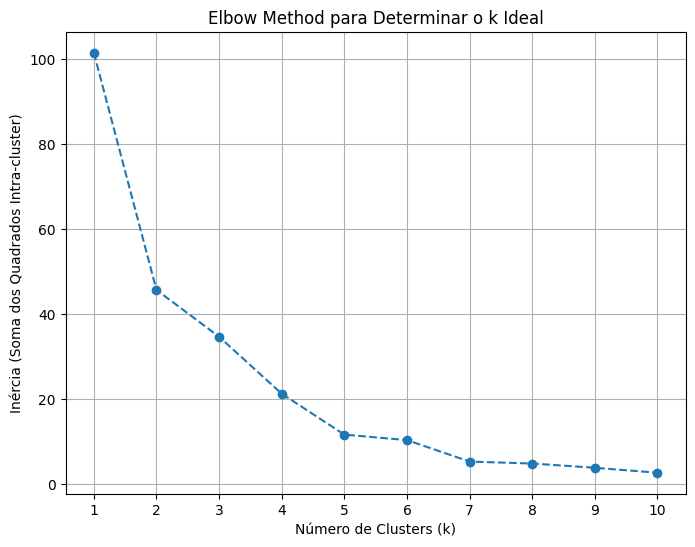

In [55]:
# Elbow Method
# Calcular a inércia (soma dos quadrados das distâncias) para diferentes números de clusters
inertias = []
possible_k_values = range(1, 11)  # Testando de 1 a 10 clusters

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(norm_data)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(possible_k_values, inertias, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma dos Quadrados Intra-cluster)')
plt.title('Elbow Method para Determinar o k Ideal')
plt.xticks(possible_k_values)
plt.grid()
plt.show()

In [ ]:
# Aplicar KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df_escolaridade['cluster'] = kmeans.fit_predict(norm_data)

# Juntar com df_crimes para obter os nomes
df_merged = df_escolaridade.merge(df_crimes[['Dicofre', 'Freguesia']], on='Dicofre', how='left')

# Gráfico 3D interativo
fig = px.scatter_3d(
    df_merged,
    x='Viúvo',
    y='Casado',
    z='Divorciado',
    color='cluster',
    text='Freguesia',  # Nome que aparecerá ao passar o mouse
    title='Clustering 3D por Estado Civil com Freguesia',
    color_continuous_scale='Viridis'
)

fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))
fig.update_layout(
    scene=dict(
        xaxis_title='Viúvo',
        yaxis_title='Casado',
        zaxis_title='Divorciado'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


c:\Users\emanu\anaconda3\envs\ADE\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\emanu\anaconda3\envs\ADE\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\emanu\anaconda3\envs\ADE\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\emanu\anaconda3\envs\ADE\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\emanu\anaconda3\envs\ADE\Lib\subprocess.py", line 1540, in _execute_c

In [8]:
civil_only = df_features[['Casado', 'Solteiro', 'Divorciado', 'Viúvo']]

k = 4
kmeans_civil = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_civil.fit(civil_only)

df_features['Cluster_Civil'] = kmeans_civil.labels_


NameError: name 'df_features' is not defined

In [ ]:
for c in sorted(df_features['Cluster_Civil'].unique()):
    print(f"\n🟦 Cluster {c}")
    print(df_features[df_features['Cluster_Civil'] == c][['Casado', 'Solteiro', 'Divorciado', 'Viúvo', 'Crimes']])



🟦 Cluster 0
          Casado  Solteiro  Divorciado  Viúvo  \
Dicofre                                         
110608.0   11798     16931        3463   3170   
110621.0   11475     18087        2925   2992   
110633.0   10773     15241        3034   3131   
110639.0   11782     16378        3388   2528   
110654.0   10229     17032        3316   2732   
110656.0    9485     18795        2938   2084   
110663.0    8269     15395        2513   2298   

                                                     Crimes  
Dicofre                                                      
110608.0  https://www.publico.pt/2024/09/19/sociedade/no...  
110621.0  https://www.publico.pt/2023/04/06/sociedade/no...  
110633.0  https://www.publico.pt/2023/03/14/sociedade/no...  
110639.0  https://www.publico.pt/2024/01/27/sociedade/no...  
110654.0  https://www.publico.pt/2024/10/23/sociedade/no...  
110656.0  https://www.publico.pt/2023/04/20/sociedade/no...  
110663.0  https://www.publico.pt/2024/10/02/socie